#### In this example, we will explore the use of various classifiers from the scikit-learn package. Again, we'll use the modified Video Store data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
vstable = pd.read_csv("Video_Store_2.csv", index_col=0)

vstable.shape

(50, 7)

In [3]:
vstable.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000,25,32,2.5,Action,Yes
2,F,54000,33,12,3.4,Drama,No
3,F,32000,20,42,1.6,Comedy,No
4,F,59000,70,16,4.2,Drama,Yes
5,M,37000,35,25,3.2,Action,Yes


#### Let's separate the target attribute and the attributes used for model training

In [4]:
vs_records = vstable[['Gender','Income','Age','Rentals','Avg Per Visit','Genre']]
vs_records.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre
Cust ID,,,,,,
1,M,45000,25,32,2.5,Action
2,F,54000,33,12,3.4,Drama
3,F,32000,20,42,1.6,Comedy
4,F,59000,70,16,4.2,Drama
5,M,37000,35,25,3.2,Action


In [5]:
vs_target = vstable.Incidentals
vs_target.head()

Cust ID
1    Yes
2     No
3     No
4    Yes
5    Yes
Name: Incidentals, dtype: object

#### Next, we use Pandas "get_dummies" function to create dummy variables. 

In [6]:
vs_matrix = pd.get_dummies(vs_records[['Gender','Income','Age','Rentals','Avg Per Visit','Genre']])
vs_matrix.head(10)

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
1,45000,25,32,2.5,False,True,True,False,False
2,54000,33,12,3.4,True,False,False,False,True
3,32000,20,42,1.6,True,False,False,True,False
4,59000,70,16,4.2,True,False,False,False,True
5,37000,35,25,3.2,False,True,True,False,False
6,18000,20,29,1.7,False,True,True,False,False
7,29000,45,19,3.8,True,False,False,False,True
8,74000,25,31,2.4,False,True,True,False,False
9,38000,21,18,2.1,False,True,False,True,False


#### Next, we divide the data into randomized training and test partitions (note that the same split should also be perfromed on the target attribute). The easiest way to do this is to use the "train_test_split" module of "sklearn.cross_validation". 

In [7]:
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state=33)

print(vs_test.shape)
vs_test[0:5]

(10, 9)


,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
6,18000,20,29,1.7,False,True,True,False,False
28,57000,52,22,4.1,False,True,False,True,False
38,41000,38,20,3.3,False,True,False,False,True
16,17000,19,26,2.2,False,True,True,False,False
41,50000,33,17,1.4,True,False,False,False,True


In [8]:
print(vs_train.shape)
vs_train[0:5]

(40, 9)


,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
30,41000,25,17,1.4,False,True,True,False,False
35,74000,29,43,4.6,False,True,True,False,False
18,6000,16,39,1.8,True,False,True,False,False
40,17000,19,32,1.8,False,True,True,False,False
2,54000,33,12,3.4,True,False,False,False,True


#### Performing min-max normalization to rescale numeric attributes.

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)

vs_train_norm = min_max_scaler.transform(vs_train)
vs_train_norm = pd.DataFrame(vs_train_norm, columns=vs_train.columns, index=vs_train.index)

vs_test_norm = min_max_scaler.transform(vs_test)
vs_test_norm = pd.DataFrame(vs_test_norm, columns=vs_test.columns, index=vs_test.index)

In [11]:
# np.set_printoptions(precision=2, linewidth=80, suppress=True)
vs_train_norm.head()

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
30,0.454545,0.181818,0.162162,0.057143,0.0,1.0,1.0,0.0,0.0
35,0.829545,0.254545,0.864865,0.971429,0.0,1.0,1.0,0.0,0.0
18,0.056818,0.018182,0.756757,0.171429,1.0,0.0,1.0,0.0,0.0
40,0.181818,0.072727,0.567568,0.171429,0.0,1.0,1.0,0.0,0.0
2,0.602273,0.327273,0.027027,0.628571,1.0,0.0,0.0,0.0,1.0


In [12]:
vs_test_norm.head()

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
6,0.193182,0.090909,0.486486,0.142857,0.0,1.0,1.0,0.0,0.0
28,0.636364,0.672727,0.297297,0.828571,0.0,1.0,0.0,1.0,0.0
38,0.454545,0.418182,0.243243,0.600000,0.0,1.0,0.0,0.0,1.0
16,0.181818,0.072727,0.405405,0.285714,0.0,1.0,1.0,0.0,0.0
41,0.556818,0.327273,0.162162,0.057143,1.0,0.0,0.0,0.0,1.0


#### We will use the KNN, decision tree, and naive Bayes classifiers from sklearn.

In [13]:
from sklearn import neighbors, tree, naive_bayes

#### First, we'll use KNN classifer. You can vary K and monitor the accuracy metrics (see below) to find the best value.

In [14]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train_norm, vs_target_train)

KNeighborsClassifier(weights='distance')

#### Next, we call the predict function on the test intances to produce the predicted classes.

In [15]:
knnpreds_test = knnclf.predict(vs_test_norm)

In [16]:
print(knnpreds_test)

['No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes']


#### scikit-learn has various modules that can be used to evaluate classifier accuracy

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(vs_target_test, knnpreds_test))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         4
         Yes       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print(knncm)

[[4 0]
 [0 6]]


#### We can also compute the average accuracy score across the test instances

In [21]:
print(knnclf.score(vs_test_norm, vs_target_test))

1.0


#### This can be compared to the performance on the training data itself (to check for over- or under-fitting)

In [22]:
print(knnclf.score(vs_train_norm, vs_target_train))

1.0


#### Next, let's use a decision tree classifier:

In [23]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [24]:
treeclf = treeclf.fit(vs_train, vs_target_train)

In [25]:
treepreds_test = treeclf.predict(vs_test)
print(treepreds_test)

['No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No']


In [26]:
print(treeclf.score(vs_test, vs_target_test))

0.6


In [27]:
print(treeclf.score(vs_train, vs_target_train))

0.95


In [28]:
print(classification_report(vs_target_test, treepreds_test))

              precision    recall  f1-score   support

          No       0.50      0.75      0.60         4
         Yes       0.75      0.50      0.60         6

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



In [29]:
treecm = confusion_matrix(vs_target_test, treepreds_test)
print(treecm)

[[3 1]
 [3 3]]


#### We can actually plot the confusion matrix for better visualization:

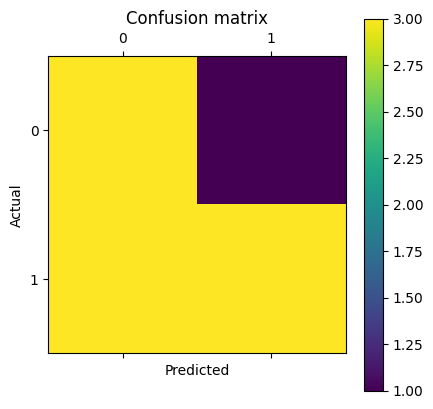

In [30]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Now, let's try the (Gaussian) naive Bayes classifier:

In [31]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(vs_train, vs_target_train)
nbpreds_test = nbclf.predict(vs_test)
print(nbpreds_test)

['Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes']


In [32]:
print(nbclf.score(vs_train, vs_target_train))

0.675


In [33]:
print(nbclf.score(vs_test, vs_target_test))

0.8


#### Finally, let's try linear discriminant analysis:

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(vs_train, vs_target_train)
ldpreds_test = ldclf.predict(vs_test)
print(ldpreds_test)

['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes']


In [35]:
print(ldclf.score(vs_train, vs_target_train))

0.725


In [36]:
print(ldclf.score(vs_test, vs_target_test))

0.9


#### Next, let's see how we can use the cross-validation module from scikit-learn. This allows for n-fold cross validation without the necessity to split the data set manually.

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
cv_scores = cross_val_score(treeclf, vs_matrix, vs_target, cv=5)
print(cv_scores)

[0.5 0.4 0.8 0.4 0.7]


In [39]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.56 (+/- 0.32)


#### Visualizing the decision tree

In [40]:
from sklearn.tree import export_graphviz

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

tree = export_graphviz(treeclf, out_file=None, feature_names=vs_train.columns, class_names=['No','Yes'])
graph = Source(tree)

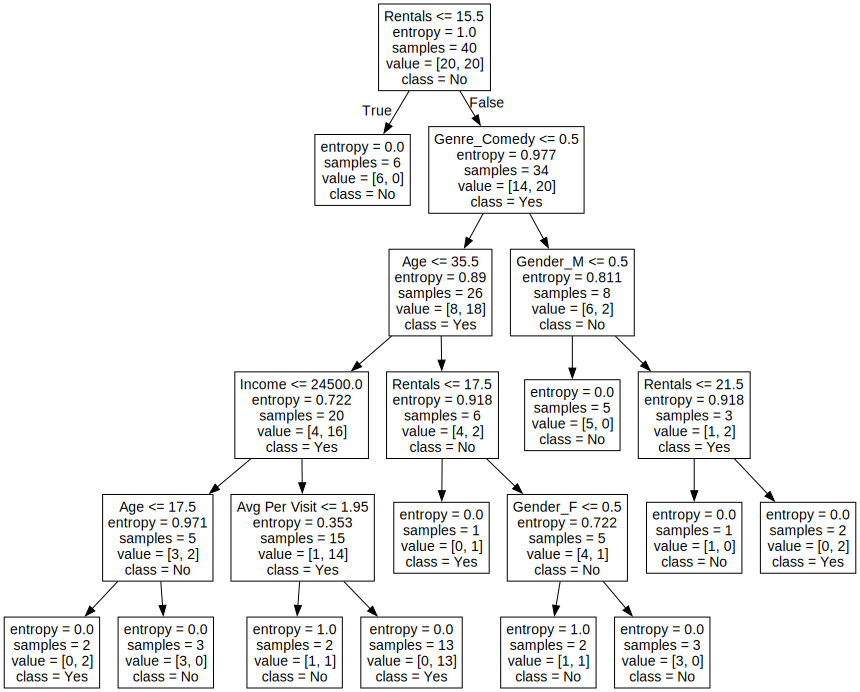

In [41]:
display(SVG(graph.pipe(format='svg')))

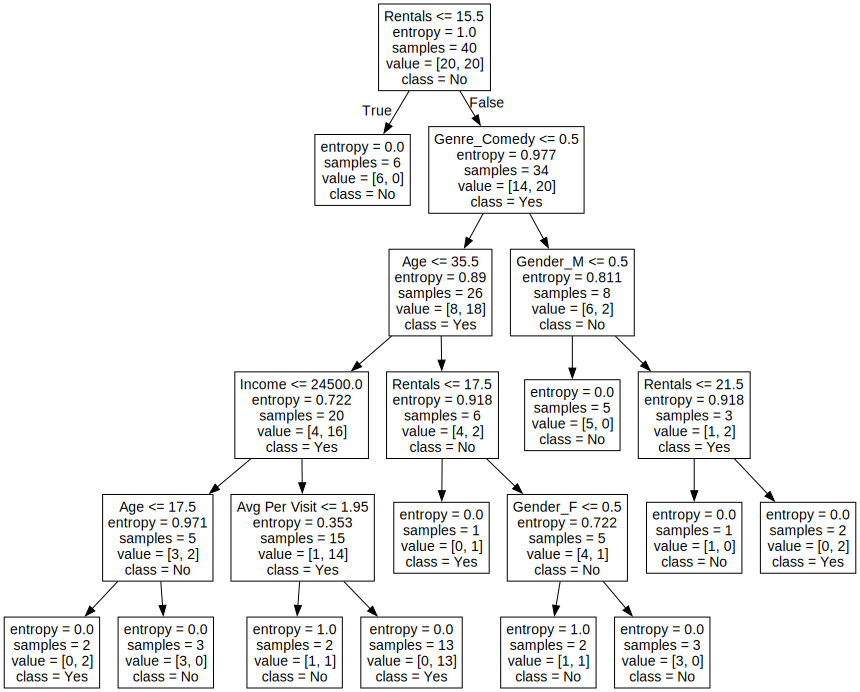

In [42]:
tree = export_graphviz(treeclf,out_file='tree.dot', feature_names=vs_train.columns, class_names=['No','Yes'])

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format="png")

#### Alternatively, you can use GraphViz or some other tool outside Jupyter environment to convert the dot file into an image file (e.g., a .png file) and save it to a local directory. Then, the image can be displayed in Jupyter as follows.

In [43]:
system(dot -Tpng tree.dot -o dtree.png)

[]

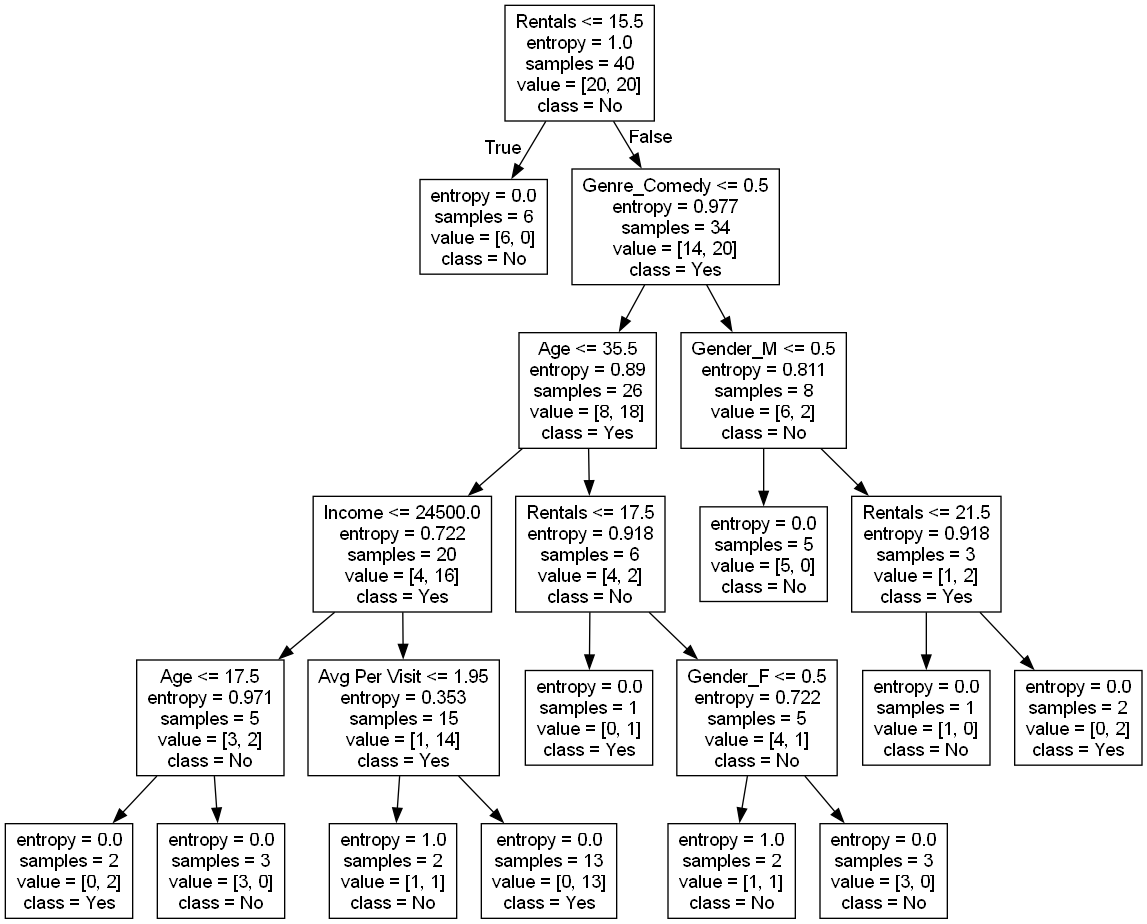

In [44]:
from IPython.display import Image
Image(filename='dtree.png', width=900)